<a href="https://colab.research.google.com/github/ypolite/Hands-On-Data-Analysis-with-Pandas/blob/master/Copy_of_Copy_of_traffic_violation01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving policeact.csv to policeact.csv


In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['policeact.csv']),sep=",")
print(df2.shape)
df2.head(10)

(91740, 15)


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,1/23/2005,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
1,RI,2/17/2005,4:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2,RI,2/20/2005,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
3,RI,2/24/2005,1:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
4,RI,3/14/2005,10:00,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
5,RI,3/29/2005,21:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
6,RI,4/4/2005,21:25,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
7,RI,7/14/2005,11:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
8,RI,7/14/2005,19:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
9,RI,7/18/2005,19:10,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91740 entries, 0 to 91739
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91740 non-null  object 
 1   stop_date           91740 non-null  object 
 2   stop_time           91740 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86535 non-null  object 
 5   driver_race         86538 non-null  object 
 6   violation_raw       86538 non-null  object 
 7   violation           86538 non-null  object 
 8   search_conducted    91740 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86538 non-null  object 
 11  is_arrested         86538 non-null  object 
 12  stop_duration       86538 non-null  object 
 13  drugs_related_stop  91740 non-null  bool   
 14  district            91740 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [ ]:
df2['stop_date'] = pd.to_datetime(df2['stop_date'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91740 entries, 0 to 91739
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               91740 non-null  object        
 1   stop_date           91740 non-null  datetime64[ns]
 2   stop_time           91740 non-null  object        
 3   county_name         0 non-null      float64       
 4   driver_gender       86535 non-null  object        
 5   driver_race         86538 non-null  object        
 6   violation_raw       86538 non-null  object        
 7   violation           86538 non-null  object        
 8   search_conducted    91740 non-null  bool          
 9   search_type         3307 non-null   object        
 10  stop_outcome        86538 non-null  object        
 11  is_arrested         86538 non-null  object        
 12  stop_duration       86538 non-null  object        
 13  drugs_related_stop  91740 non-null  bool      

In [ ]:
df2.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91740
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88433
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [ ]:
df2['search_type'].unique()

array([nan, 'Probable Cause', 'Incident to Arrest',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Probable Cause,Protective Frisk,Reasonable Suspicion',
       'Reasonable Suspicion', 'Incident to Arrest,Protective Frisk',
       'Inventory,Protective Frisk', 'Inventory',
       'Incident to Arrest,Inventory', 'Inventory,Probable Cause',
       'Protective Frisk,Reasonable Suspicion',
       'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable 

In [ ]:
df2.drop(['county_name','search_type','violation_raw'], axis = 1, inplace = True)

In [ ]:
df2 = df2.dropna()

print(df2.shape)
df2.head(10)

(86535, 12)


,state,stop_date,stop_time,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-23,23:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
1,RI,2005-02-17,4:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4
2,RI,2005-02-20,17:15,M,White,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1
3,RI,2005-02-24,1:20,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone X3
4,RI,2005-03-14,10:00,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
5,RI,2005-03-29,21:55,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
6,RI,2005-04-04,21:25,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K1
7,RI,2005-07-14,11:20,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4
8,RI,2005-07-14,19:55,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4
9,RI,2005-07-18,19:10,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3


In [ ]:
df2.rename({'stop_duration': 'stop_duration (mins)'}, axis = 1)

,state,stop_date,stop_time,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration (mins),drugs_related_stop,district
0,RI,2005-01-23,23:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
1,RI,2005-02-17,4:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4
2,RI,2005-02-20,17:15,M,White,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1
3,RI,2005-02-24,1:20,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone X3
4,RI,2005-03-14,10:00,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
...,...,...,...,...,...,...,...,...,...,...,...,...
91735,RI,2015-12-31,21:21,F,Black,Moving violation,False,Citation,False,0-15 Min,False,Zone K2
91736,RI,2015-12-31,21:59,F,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
91737,RI,2015-12-31,22:04,M,White,Moving violation,False,Citation,False,0-15 Min,False,Zone X3
91738,RI,2015-12-31,22:09,F,Hispanic,Equipment,False,Warning,False,0-15 Min,False,Zone K3


In [ ]:
df2[['stop_duration', 'min']] = df2['stop_duration'].str.split(' ', expand = True)

In [ ]:
df2.drop('min', axis = 1, inplace = True)

In [ ]:
df2.columns

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation', 'search_conducted', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'district'],
      dtype='object')

In [ ]:
gender_race = df2.groupby(['driver_race','driver_gender']).size().sort_values(ascending = False)

gender_race

driver_race  driver_gender
White        M                43333
             F                18536
Black        M                 9604
Hispanic     M                 7774
Black        F                 2681
Hispanic     F                 1953
Asian        M                 1838
             F                  551
Other        M                  212
             F                   53
dtype: int64

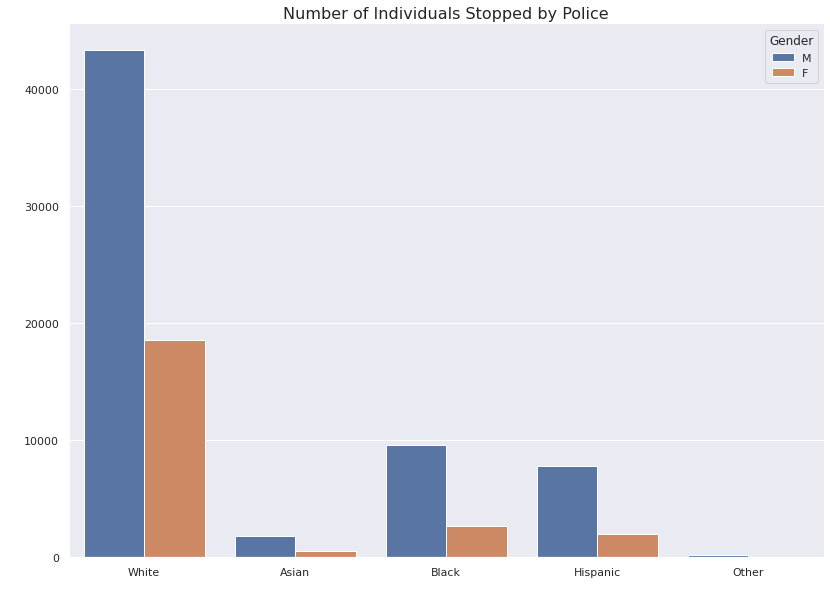

In [ ]:
sns.set_theme(style = 'darkgrid')
ax = sns.catplot(data = df2, x = 'driver_race', kind = 'count', hue = 'driver_gender', legend = False, height=8.27, aspect=11.7/8.27)
plt.title('Number of Individuals Stopped by Police', fontsize = 16)
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(title = 'Gender')


Text(0.5, 8.960000000000015, ' ')

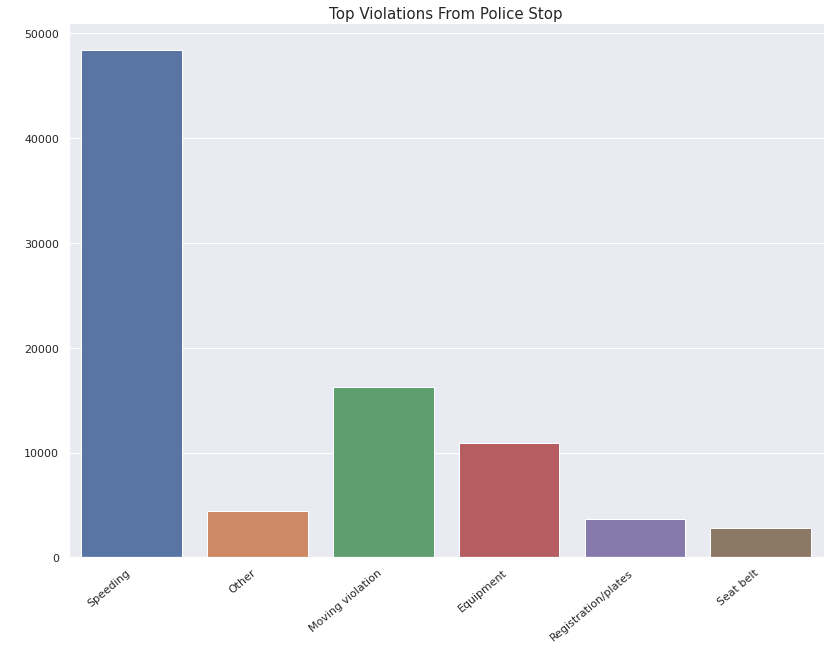

In [ ]:
sns.catplot(data = df2, x = 'violation', kind = 'count', dodge=False, height = 8.27, aspect = 11.7/8.27)
plt.xticks(rotation =40, ha ="right")
plt.title('Top Violations From Police Stop', fontsize = 15)
plt.ylabel(' ')
plt.xlabel(' ')

Text(-8.665, 0.5, ' ')

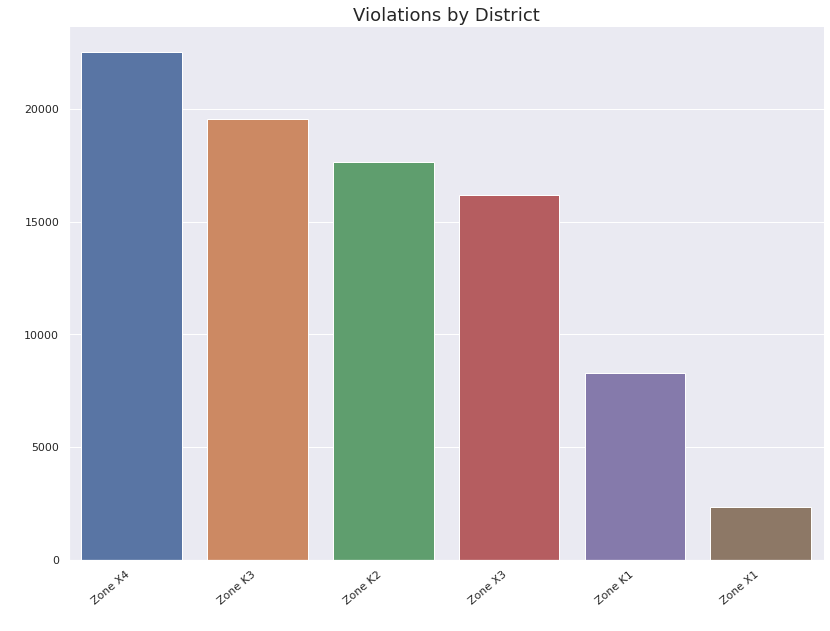

In [ ]:
#df3 = df2.iloc[:,['Zone X4','Zone K3','Zone K2','Zone X3','Zone K1','Zone X1']]
sns.catplot(data = df2, x = 'district', kind = 'count', height = 8.27, aspect = 11.7/8.27, ci=None, order=df2['district'].value_counts().index)
#df.iloc[:, [2,3,1,0]]
plt.title('Violations by District', fontsize = 18)
plt.xlabel(' ')
plt.xticks(rotation = 40, ha = "right")
plt.ylabel(' ')

In [ ]:
df2['search_conducted'] = df2['search_conducted'].replace({True: 1, False: 0})

df2['search_conducted']

0        0
1        0
2        0
3        0
4        0
        ..
91735    0
91736    0
91737    0
91738    0
91739    0
Name: search_conducted, Length: 86535, dtype: int64

In [ ]:
df2['is_arrested'] = df2['is_arrested'].replace({True: 1, False: 0})

df2['is_arrested']

0        0
1        0
2        1
3        0
4        0
        ..
91735    0
91736    0
91737    0
91738    0
91739    0
Name: is_arrested, Length: 86535, dtype: int64

In [ ]:
search_arrest = pd.concat([df2['search_conducted'],  df2['is_arrested']], axis = 1)

search_arrest = search_arrest[search_arrest['search_conducted'] == 1]

search_arrest

,search_conducted,is_arrested
45,1,0
60,1,1
93,1,1
119,1,1
136,1,0
...,...,...
91445,1,0
91452,1,1
91490,1,0
91604,1,0


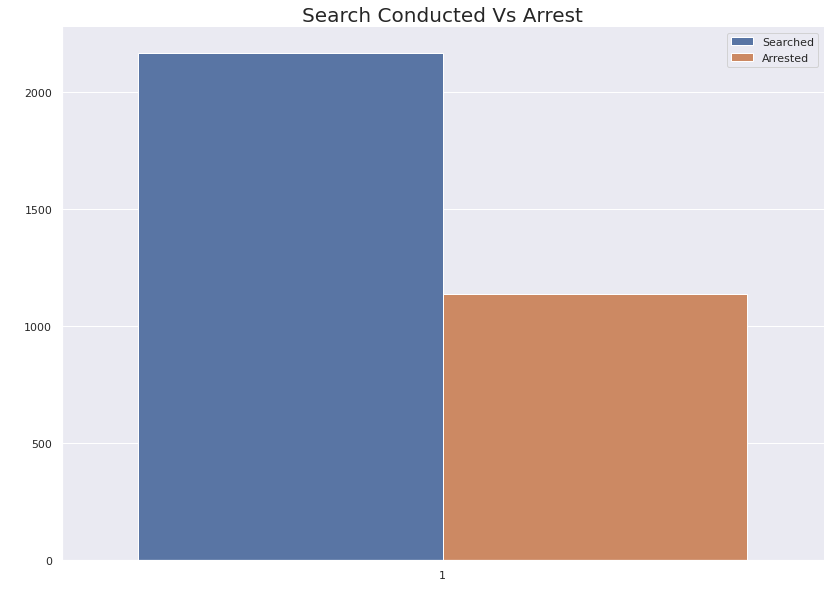

In [ ]:
sns.catplot(data = search_arrest, x = 'search_conducted', kind = 'count', hue = 'is_arrested', legend = False, height = 8.27, aspect = 11.7/8.27)
plt.title('Search Conducted Vs Arrest', fontsize = 20)
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(labels = ['Searched', 'Arrested'])

# Create a dataframe for female drivers stopped for speeding

In [ ]:
female_speeder = df2[(df2.driver_gender == "F") & (df2.violation == "Speeding")]

female_speeder.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
3,RI,2005-02-24,1:20,F,White,Speeding,0,Citation,0,0-15,False,Zone X3
4,RI,2005-03-14,10:00,F,White,Speeding,0,Citation,0,0-15,False,Zone K3
7,RI,2005-07-14,11:20,F,White,Speeding,0,Citation,0,0-15,False,Zone X4
10,RI,2005-07-18,19:30,F,White,Speeding,0,Citation,0,0-15,False,Zone K3
12,RI,2005-07-24,20:10,F,White,Speeding,0,Citation,0,0-15,False,Zone K3


# Create a dataframe for male drivers stopped for speeding

In [ ]:
male_speeder = df2[(df2.driver_gender == "M") & (df2.violation == "Speeding")]

male_speeder.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-23,23:15,M,White,Speeding,0,Citation,0,0-15,False,Zone K3
1,RI,2005-02-17,4:15,M,White,Speeding,0,Citation,0,0-15,False,Zone X4
5,RI,2005-03-29,21:55,M,White,Speeding,0,Citation,0,0-15,False,Zone K3
6,RI,2005-04-04,21:25,M,White,Speeding,0,Citation,0,0-15,False,Zone K1
8,RI,2005-07-14,19:55,M,White,Speeding,0,Citation,0,0-15,False,Zone X4


# Compute the stop outcomes for female drivers (as proportions)

In [ ]:
female_outcome = female_speeder.stop_outcome.value_counts() 
total = 15646
index = ['Citation', 'Warning', 'Arrest Driver', 'N/D', 'Arrest Passenger', 'No Action']

for i, j in zip(index, female_outcome):
  a = (j/total)
  #print(i)
  #print(i + ':' , round(a, ndigits= 2)) #+ "%" ## This is what you wrote
  print("%.3f%%"  % (j * 100.0/total))         ## This is what I propose


95.219%
4.007%
0.575%
0.096%
0.064%
0.038%


# Compute the stop outcomes for male drivers (as proportions)

In [ ]:
male_outcome = male_speeder.stop_outcome.value_counts() 
index = ['Citation', 'Warning', 'Arrest Driver', 'N/D', 'Arrest Passenger', 'No Action']
total = 32777

for i, j in zip(index, male_outcome):
  a = (j/total)
  #print(i + ':' , round(a, ndigits= 2)) 
  print("%.3f%%"  % (j * 100.0/total)) 

94.460%
3.618%
1.590%
0.128%
0.107%
0.098%


# Create a line plot of 'hourly_arrest_rate'

[Text(0, 0, '00:00'),
 Text(0, 0, '01:00'),
 Text(0, 0, '02:00'),
 Text(0, 0, '03:00'),
 Text(0, 0, '04:00'),
 Text(0, 0, '05:00'),
 Text(0, 0, '06:00'),
 Text(0, 0, '07:00'),
 Text(0, 0, '08:00'),
 Text(0, 0, '09:00'),
 Text(0, 0, '10:00'),
 Text(0, 0, '11:00'),
 Text(0, 0, '12:00'),
 Text(0, 0, '13:00'),
 Text(0, 0, '14:00'),
 Text(0, 0, '15:00'),
 Text(0, 0, '16:00'),
 Text(0, 0, '17:00'),
 Text(0, 0, '18:00'),
 Text(0, 0, '19:00'),
 Text(0, 0, '20:00'),
 Text(0, 0, '21:00'),
 Text(0, 0, '22:00')]

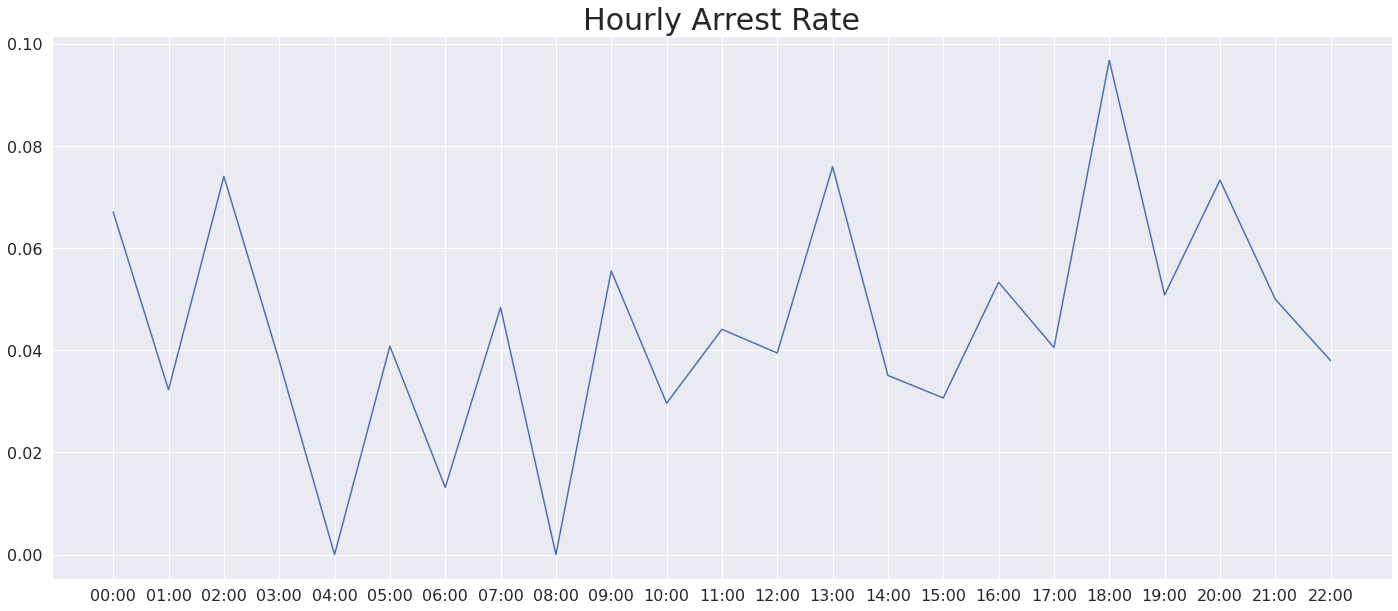

In [ ]:
import matplotlib.dates as md
arrest_rate = df2.groupby('stop_time')['is_arrested'].mean()#*100
#hourly_arrest_rate = df2.groupby(df2.index.hour).is_arrested.mean()
arrest_rate_plot = arrest_rate[0:23:1]
#fig, ax = plt.subplots(figsize = (12, 8))

plt.figure(figsize = (24,10))
plt.plot(arrest_rate_plot)
#plt.plot(hourly_arrest_rate)
plt.title('Hourly Arrest Rate', fontsize = 30)
#ax.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 30]))
#ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
#plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
labels = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00' ]
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.gca().set_xticklabels(labels)

#plt.show()

# Answer the following questions in sequence
* Create a frequency table of districts and violations
* Save the frequency table as 'all_zones'
* Select rows 'Zone K1' through 'Zone K3'
* Save the smaller table as 'k_zones'
* Create a bar plot of 'k_zones'
* Display the plot

In [ ]:
#all_zones = df2.groupby(['district', 'violation']).size()
all_zones = pd.crosstab(df2.district, df2.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3540,5353,1560,1411,843,9795


In [ ]:
k_zones = all_zones.loc['Zone K1':'Zone K3']
print(all_zones.loc['Zone K1':'Zone K3'])
#k_zones

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


Text(0.5, 1.0, 'K Zone Districts')

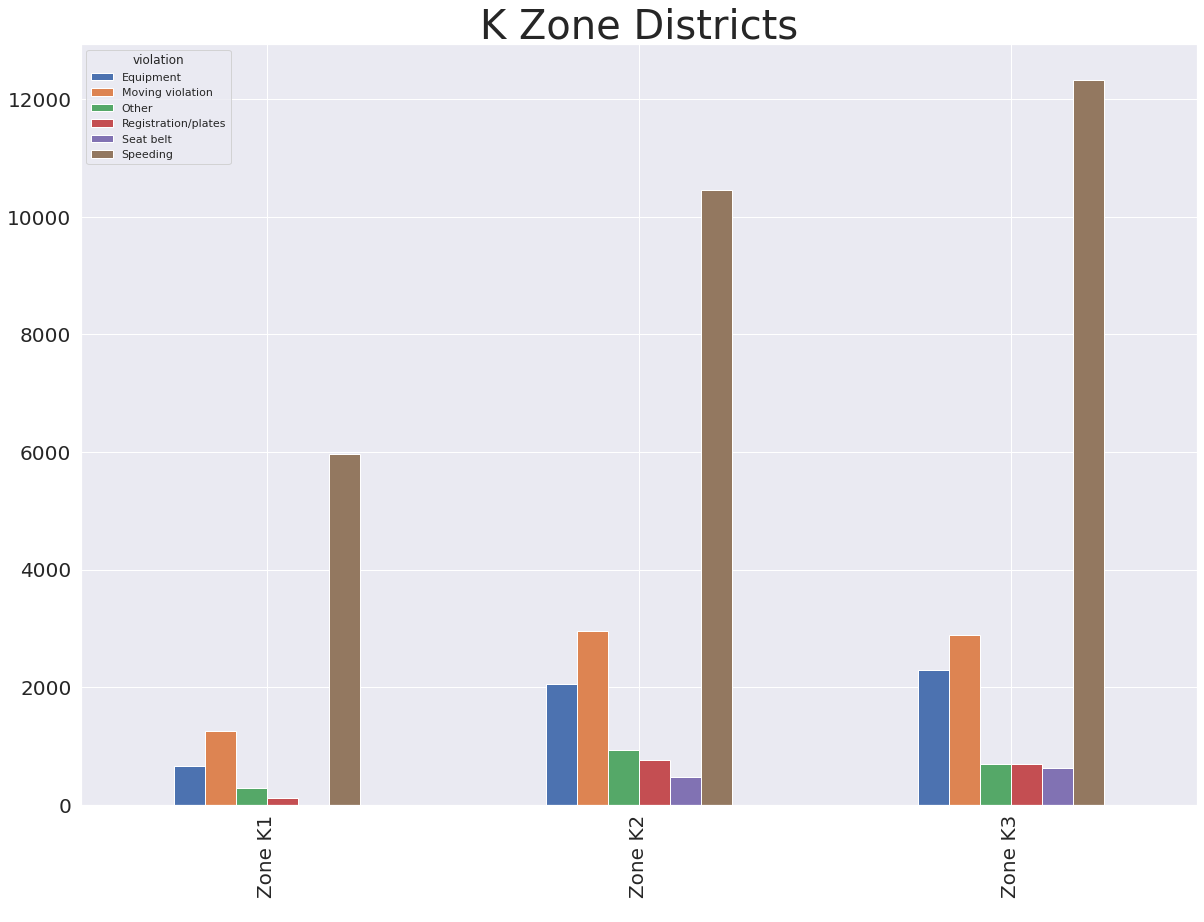

In [ ]:

k_zones.plot(kind = 'bar', figsize = (20, 14),fontsize = 20, xlabel = " ")
plt.title('K Zone Districts', fontsize = 40)
#plt.show()

#plt.plot(k_zones)

#sns.barplot(data = k_zones, x = k_zones.index, y = k_zones.values, hue = k_zones.index)

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('traffic_violation01.ipynb')

--2022-06-28 23:45:37--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-06-28 23:45:37 (28.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/


ValueError: ignored